# TWITTER CLASSIFICATION PROJECT PART - 1

## In this project, I am going to predict whether a tweet will go viral. (Using KNN)

### Importing required Libraries


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Loading and Exploring data

In [2]:
# "lines = True" Reads the file as a json object per line.
all_tweets = pd.read_json("random_tweets.json", lines = True) 

Getting an overview of the dataset

In [3]:
all_tweets.head()                  # Gives info of 1st 5 rows

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status,withheld_in_countries
0,2018-07-31 13:34:40+00:00,1024287229525598210,1024287229525598208,RT @KWWLStormTrack7: We are more than a month ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-31 13:34:40+00:00,1024287229512953856,1024287229512953856,@hail_ee23 Thanks love its just the feeling of...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.024128e+18,1.024128e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-31 13:34:40+00:00,1024287229504569344,1024287229504569344,RT @TransMediaWatch: Pink News has more on the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,0.0,NaN,NaN,NaN,NaN,NaN
3,2018-07-31 13:34:40+00:00,1024287229496029190,1024287229496029184,RT @realDonaldTrump: One of the reasons we nee...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-31 13:34:40+00:00,1024287229492031490,1024287229492031488,RT @First5App: This hearing of His Word doesn’...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
all_tweets.info()             # Displays a summary of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 11099 non-null  datetime64[ns, UTC]
 1   id                         11099 non-null  int64              
 2   id_str                     11099 non-null  int64              
 3   text                       11099 non-null  object             
 4   truncated                  11099 non-null  bool               
 5   entities                   11099 non-null  object             
 6   metadata                   11099 non-null  object             
 7   source                     11099 non-null  object             
 8   in_reply_to_status_id      1402 non-null   float64            
 9   in_reply_to_status_id_str  1402 non-null   float64            
 10  in_reply_to_user_id        1503 non-null   float64            
 11  in

In [5]:
len(all_tweets)      # This shows the number of tweets in our data

11099

In [6]:
print(all_tweets.loc[0]['text'])                        # We get user's tweet using this command 
print(all_tweets.loc[1]['text'])
print(all_tweets.loc[0]['user']['location'])            # We get user's location using this command 
print(all_tweets.loc[1]['user']['location'])

RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
@hail_ee23 Thanks love its just the feeling of eyes that get me so nervous ❤️
Waterloo, Iowa
Sherbrooke, Québec


In [7]:
pd.Series(all_tweets.loc[1]['user'])       # Keep in mind, this is a dictionary which is giving us pretty cool info.

id                                                                           2407992339
id_str                                                                       2407992339
name                                                                  indecent exposure
screen_name                                                                alyssamajor9
location                                                             Sherbrooke, Québec
description                                                  Iifes a journey enjoy it❤️
url                                                             https://t.co/Q7UGSdRBOO
entities                              {'url': {'urls': [{'url': 'https://t.co/Q7UGSd...
protected                                                                         False
followers_count                                                                     199
friends_count                                                                       203
listed_count                    

In the above dictionary, the "followers_count" feature could be useful in order to predict if a tweet will blow.

### What do we mean by a viral tweet?

A K-Nearest Neighbors classifier is a supervised machine learning algorithm, and as a result, we need to have a dataset with tagged labels. For this specific example, we need a dataset where every tweet is marked as viral or not viral. Unfortunately, there isn't a feature in our provided dataset.

We can tell if a tweet is going viral or not by the number of likes, retweets or shares on the 
particular tweet. This can be found using the feature "retweet_count"

In this section, I am going to make a column myself, if it has more retweets than 500, It is going to be a viral tweet, or else it is not a viral tweet.

Let's say we wanted to create a column called "is_viral" that is a 1 if the tweet had more than 500 retweets and 0 otherwise. We could do that like this:

In [8]:
all_tweets["is_viral"] = np.where(all_tweets['retweet_count'] >= 500,1,0)
print(all_tweets['is_viral'].value_counts())     # value counts is used to check distinct values for a column

0    8431
1    2668
Name: is_viral, dtype: int64


I am going to plot this on graph to understand in a better way

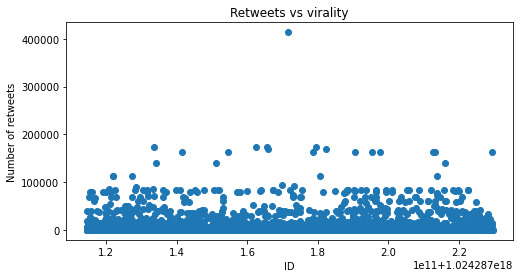

In [9]:
plt.figure(figsize = (8,4))
plt.scatter((all_tweets['id']), all_tweets['retweet_count'])
plt.xlabel('ID')
plt.ylabel('Number of retweets')
plt.title('Retweets vs virality')
plt.savefig('Outlier_retweet_count.png')
plt.show()

In [10]:
find_outlier = all_tweets['retweet_count'] >= 413715                      
all_tweets.loc[find_outlier]                            # Finding Index of the outlier to drop it

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status,withheld_in_countries,is_viral
5584,2018-07-31 13:34:26+00:00,1024287171417657344,1024287171417657344,RT @amymcollum: I know she isn't your daughter...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,1


In [11]:
pd.Series(all_tweets.loc[5584]['retweeted_status'])          # More info on outlier 

created_at                                      Tue Jul 24 22:54:33 +0000 2018
id                                                         1021891411828977664
id_str                                                     1021891411828977664
text                         I know she isn't your daughter and some of you...
truncated                                                                 True
entities                     {'hashtags': [], 'symbols': [], 'user_mentions...
metadata                     {'iso_language_code': 'en', 'result_type': 're...
source                       <a href="http://twitter.com/download/iphone" r...
in_reply_to_status_id                                                     None
in_reply_to_status_id_str                                                 None
in_reply_to_user_id                                                       None
in_reply_to_user_id_str                                                   None
in_reply_to_screen_name                             

In [12]:
all_tweets.drop([0,5584], inplace = True)          # Removed the outlier

This is how the graph looks like after removing the outlier

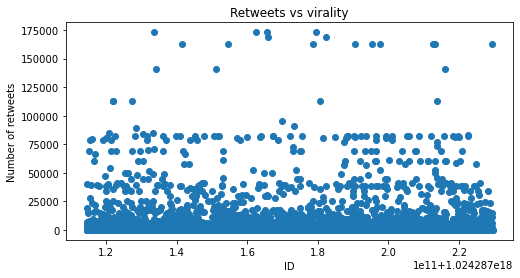

In [13]:
plt.figure(figsize = (8,4))
plt.scatter((all_tweets['id']),all_tweets['retweet_count'])
plt.xlabel('ID')
plt.ylabel('Number of retweets')
plt.title('Retweets vs virality')
plt.savefig('NO_Outlier_retweet_count.png')
plt.show()

In [14]:
len(all_tweets)       # No of tweets after removing outlier

11097

Graphs makes us understand data quickly dont they?

## Feature Engineering

I have created labels for each data point in my dataset, I am now thinking about the features, what features could determine if a tweet should go viral or nah.
Here is the list of imp features I am going to consider- <br />  <br />
1- Followers count     <br />
2- Number of hashtags used in the tweet       <br />
3- Friends count       <br />
4- Length of the tweet  <br />
5- Number of links    <br />
6- Number of words

In [15]:
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['hastags_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)    # axis = 1 will affect the whole row
all_tweets['links_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('http'), axis=1)
all_tweets['words_count'] = all_tweets.apply(lambda tweet: len(tweet['text'].split()), axis=1)

## Normalizing the data

In this section, I am gonna get rid of all data which isn't relevant to us.

In [16]:
labels = all_tweets['is_viral']
data = all_tweets[['tweet_length','followers_count','friends_count']]       # Combined
scaled_data = scale(data, axis=0)

I created a variable named "scaled_data" here, scaled_data should be the result of the scale function with data as a parameter. <br />
The scale function will normalize the data so all of the features will vary within the same range.

## Understanding features with the help of graphs

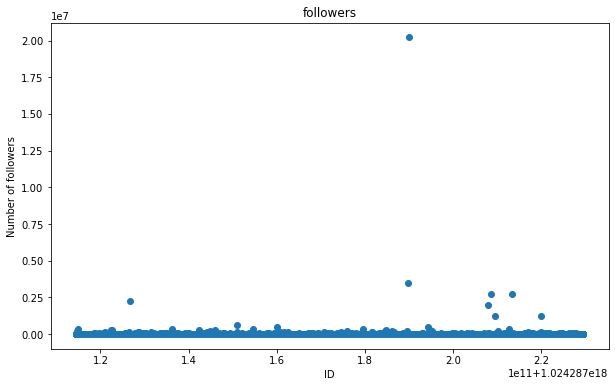

In [17]:
plt.figure(figsize = (10,6))
plt.scatter((all_tweets['id']),all_tweets['followers_count'])
plt.xlabel('ID')
plt.ylabel('Number of followers')
plt.title('followers')
plt.savefig('followers_count.png')
plt.show()

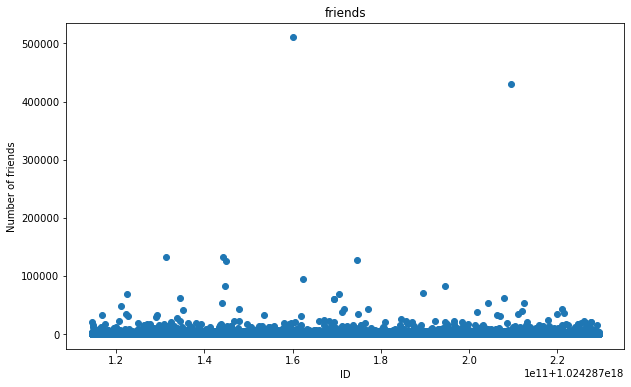

In [18]:
plt.figure(figsize = (10,6))
plt.scatter((all_tweets['id']),all_tweets['friends_count'])
plt.xlabel('ID')
plt.ylabel('Number of friends')
plt.title('friends')
plt.savefig('friends.png')
plt.show()

#### The number of followers and friends are 2 most important features in order to predict if a tweet will go viral or not. As we can see above, the graph is saturated and the reason behind this is the outliers, I will not be removing outliers from this, because I just realized that we are supposed to predict if a tweet will go viral or not and according to me, these outliers will not affect the accuracy of my model.

## Training and Test Set

I now split scaled_data and labels into a training set and test set using scikit-learn's train_test_split

In [19]:
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

## Using the classifier 

I am going to use KNN here, let's test it using n_neighbors = 5 here, then I will train the classfier using fit() command

In [20]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.709009009009009


## Changing value of K's

 <br />I am getting an accuracy of 70% when the value of k is 5, trying out different random K's is time consuming, Hence, I will plot a graph of K and will select the best K value possible. <br />
I started by creating an empty list named `scores`, then I created a for loop that has a variable `k` which begins and `1` and finishes at `200` <br /> <br />
Inside the for loop, I created a KNeighobrsClassifier object named `classifier` with the parameter `n_neighbors` equal to `k`<br /> <br />
I then Trained the classifier by calling the `.fit()` method with `train_data` and `train_labels` as parameters. <br /> <br />
I tested the model in the next line, Called classifier's `.score()` method using `test_data` and `test_labels` as parameters. append the result to scores. <br /> <br />
Now I plotted the graph to understand it better.

<IPython.core.display.Javascript object>


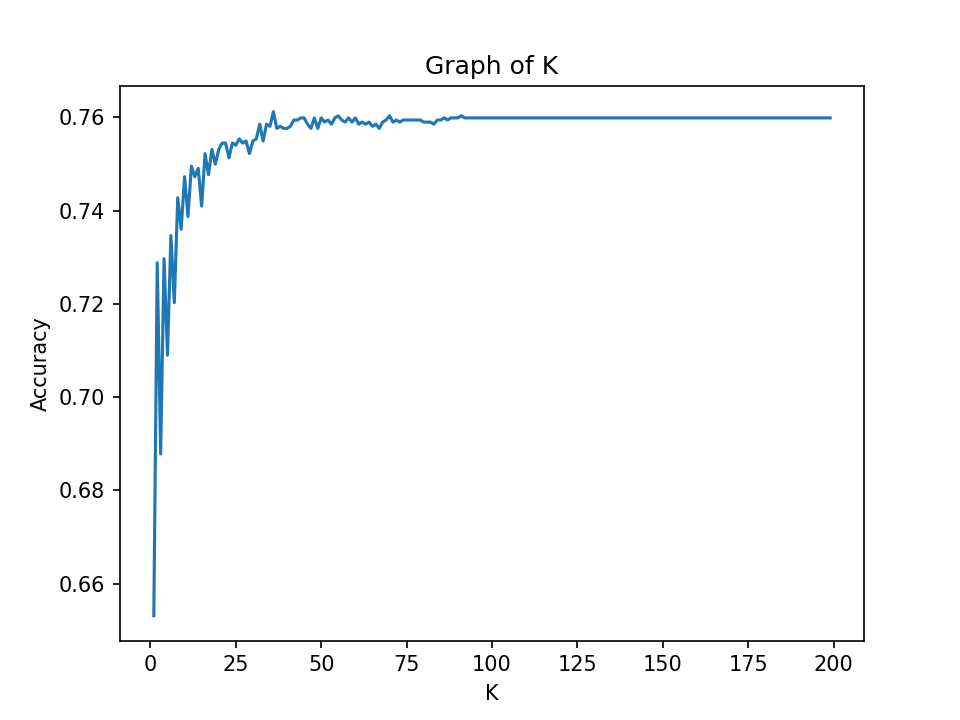

In [21]:
%matplotlib notebook
scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.plot(range(1,200), scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Graph of K')
plt.show()

In [22]:
print(max(scores))

0.7612612612612613


In [23]:
best_K = scores.index(max(scores))
print(best_K)

35


Our best K is `k=35`

### I was able to get maximum of upto 76% accuracy for this model with the given features.

# Classifying Tweets Project part 2

### In this project, I will use Naive-Bayes Classifier to find patterns in real tweets.  We have 3 datasets here, These three files contain tweets that we gathered from those locations.

### Importing required Libraries

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

### Loading and Exploring data

In [3]:
new_york_tweets = pd.read_json('new_york.json', lines = True)
london_tweets = pd.read_json('london.json', lines = True)
paris_tweets = pd.read_json('paris.json', lines = True)

### 1-  Exploring new_york_tweets

In [4]:
new_york_tweets.head()                     # Gives info of 1st 5 rows

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,extended_tweet,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,withheld_in_countries
0,2018-07-26 13:32:33+00:00,1022474755625164800,1022474755625164800,@DelgadoforNY19 Calendar marked.,"[16, 32]","<a href=""http://twitter.com/download/android"" ...",False,1.022208e+18,1.022208e+18,8.290618e+17,...,en,2018-07-26 13:32:33.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-26 13:32:34+00:00,1022474762491183104,1022474762491183104,petition to ban more than one spritz of cologne,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2018-07-26 13:32:34.697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-26 13:32:35+00:00,1022474765750226945,1022474765750226944,People really be making up beef with you in th...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2018-07-26 13:32:35.474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-26 13:32:36+00:00,1022474768736546816,1022474768736546816,30 years old.. wow what a journey... I moved t...,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",True,NaN,NaN,NaN,...,en,2018-07-26 13:32:36.186,{'full_text': '30 years old.. wow what a journ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-26 13:32:36+00:00,1022474769260838913,1022474769260838912,At first glance it looked like asparagus with ...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",True,NaN,NaN,NaN,...,en,2018-07-26 13:32:36.311,{'full_text': 'At first glance it looked like ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
new_york_tweets.info()                #  Displays a summary of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 4723 non-null   datetime64[ns, UTC]
 1   id                         4723 non-null   int64              
 2   id_str                     4723 non-null   int64              
 3   text                       4723 non-null   object             
 4   display_text_range         2811 non-null   object             
 5   source                     4723 non-null   object             
 6   truncated                  4723 non-null   bool               
 7   in_reply_to_status_id      1668 non-null   float64            
 8   in_reply_to_status_id_str  1668 non-null   float64            
 9   in_reply_to_user_id        1829 non-null   float64            
 10  in_reply_to_user_id_str    1829 non-null   float64            
 11  in_r

In [6]:
len(new_york_tweets)                   # This shows the number of tweets in our data

4723

In [7]:
print(new_york_tweets.loc[12]["text"])
print(new_york_tweets.loc[10]['user']['name'])

Be best #ThursdayThoughts
Sjava indlalifa


### 2-  Exploring london_tweets

In [8]:
london_tweets.head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweeted,filter_level,lang,timestamp_ms,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities
0,2018-07-26 13:39:30+00:00,1022476504855400449,1022476504855400448,@bbclaurak i agree Laura but the Party you see...,"[11, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.022447e+18,1.022447e+18,6.118357e+07,...,False,low,en,2018-07-26 13:39:30.109,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-26 13:39:30+00:00,1022476506075942912,1022476506075942912,@masturbacaolove Why?,"[17, 21]","<a href=""http://twitter.com/download/iphone"" r...",False,1.021997e+18,1.021997e+18,9.003777e+17,...,False,low,und,2018-07-26 13:39:30.400,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-26 13:39:31+00:00,1022476510089949190,1022476510089949184,@JackRobinson80 @pgroresearch Yeah not great b...,"[30, 65]","<a href=""http://twitter.com/download/iphone"" r...",False,1.022444e+18,1.022444e+18,7.355633e+08,...,False,low,en,2018-07-26 13:39:31.357,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-26 13:39:33+00:00,1022476519845883905,1022476519845883904,Penalty shit out Arsenal,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,False,low,en,2018-07-26 13:39:33.683,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-26 13:39:36+00:00,1022476532684648448,1022476532684648448,Obviously need some pen practice 🙈,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,False,low,en,2018-07-26 13:39:36.744,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
london_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 5341 non-null   datetime64[ns, UTC]
 1   id                         5341 non-null   int64              
 2   id_str                     5341 non-null   int64              
 3   text                       5341 non-null   object             
 4   display_text_range         3535 non-null   object             
 5   source                     5341 non-null   object             
 6   truncated                  5341 non-null   bool               
 7   in_reply_to_status_id      2230 non-null   float64            
 8   in_reply_to_status_id_str  2230 non-null   float64            
 9   in_reply_to_user_id        2444 non-null   float64            
 10  in_reply_to_user_id_str    2444 non-null   float64            
 11  in_r

In [10]:
print(len(london_tweets))

5341


### 3 -  Exploring paris_tweets

In [11]:
paris_tweets.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,lang,timestamp_ms,display_text_range,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet
0,2018-07-27 17:40:45+00:00,1022899608396156928,1022899608396156928,Bulletin météo parisien : des grêlons énormes ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,fr,2018-07-27 17:40:45.854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-27 17:40:47+00:00,1022899613550956544,1022899613550956544,Prêt pour le match #USORCL https://t.co/V5jw0S...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,fr,2018-07-27 17:40:47.083,"[0, 26]","{'media': [{'id': 1022899599336525825, 'id_str...",0.0,NaN,NaN,NaN,NaN,NaN
2,2018-07-27 17:40:50+00:00,1022899626041651200,1022899626041651200,MAIS QOIDBDNND'SLS'SLSLLSLS''D DBDODNDNODJDBKD...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,in,2018-07-27 17:40:50.061,"[0, 111]","{'media': [{'id': 1022899571884744706, 'id_str...",0.0,NaN,NaN,NaN,NaN,NaN
3,2018-07-27 17:40:57+00:00,1022899655347249152,1022899655347249152,@ToursFC Où peut on le championnat de National...,"<a href=""http://twitter.com/download/android"" ...",False,1.022888e+18,1.022888e+18,978599220.0,978599220.0,...,fr,2018-07-27 17:40:57.048,"[9, 50]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-27 17:40:57+00:00,1022899656685223936,1022899656685223936,Les tismey ils sont bas qu’a tromper leur go e...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,fr,2018-07-27 17:40:57.367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
len(paris_tweets)

2510

So, New York, London and Paris has 4723, 5341, 2510 tweets respectively.

## Classifying using language: Naive Bayes Classifier

Let's begin by looking at the way language is used differently in these three locations. Let's grab the text of all of the tweets and make it one big list. 

In [20]:
new_york_text = new_york_tweets["text"].tolist()
london_text = london_tweets["text"].tolist()                # Taking out the 'text' feature from each DF
paris_text = paris_tweets["text"].tolist()

all_tweets = new_york_text + london_text + paris_text             # Combined text data

I am now going to make *labels* associated with these tweets, <br />
0 -  represents a New York tweet <br />
1 -  represents a London tweet <br />
2 -  represents a Paris tweet

In [21]:
labels = [0] * len(new_york_text) + [1] * len(london_text) + [2] * len(paris_text)

### Let's plot these on graph for better understandings

<BarContainer object of 3 artists>

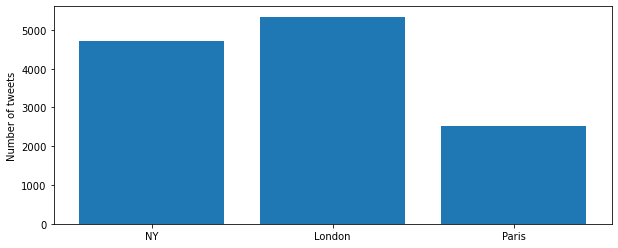

In [15]:
sizes = [
    len(new_york_tweets),
    len(london_tweets),
    len(paris_tweets),
]
plt.figure(figsize = (10,4))
plt.ylabel("Number of tweets")
labels = ["NY", "London", "Paris"]
plt.bar(range(len(sizes)), sizes, tick_label=labels)

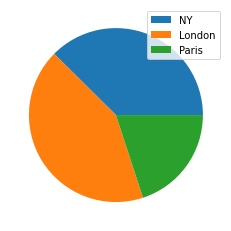

In [16]:
sizes = [len(new_york_tweets), len(london_tweets), len(paris_tweets),]
labelz = ['NY', 'London', 'Paris']
plt.pie(sizes)
plt.legend(labelz)
plt.show()

## Making a Training and Test Set

I am gonna break the data into training set and test set

In [22]:
train_data, test_data, train_labels, test_labels = train_test_split(all_tweets, labels, test_size = 0.2, random_state = 1)

Printing to check if it has loaded properly 

In [23]:
print(len(train_data))
print(len(test_data))

10059
2515


## Making the count vector

To use a Naive Bayes Classifier, we need to transform our lists of words into count vectors. <br />
This changes the sentence `"I love New York, New York"` into a list that contains:<br />

Two `1s` because the words `"I"` and `"love"` each appear once.<br />
Two `2s` because the words `"New"` and `"York"` each appear twice.<br />
Many `0s` because every other word in the training set didn't appear at all.

In [24]:
counter = CountVectorizer()                    # create a CountVectorizer named counter
counter.fit(train_data)                        # This teaches the counter our vocabulary.
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

Let's see what our tweet looks like as a count vector

In [27]:
print(train_data[5])
print(train_counts[5])

@TonyC_BaH @simonjpaine @PaulaW_BaH @wwardrobebl1 I am in Tony. I need the help!
  (0, 2340)	1
  (0, 12560)	1
  (0, 13530)	1
  (0, 18711)	1
  (0, 20395)	1
  (0, 24712)	1
  (0, 26698)	1
  (0, 27257)	1
  (0, 27261)	1
  (0, 29799)	1


## Train and Test the Naive Bayes Classifier

We now have the inputs to our classifier. Let's use the CountVectors to train and test the Naive Bayes Classifier!

In [29]:
classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)

## Evaluating our Model

Now that the classifier has made its predictions, let's see how well it did.  <br />
  <br />
The way to do this is by calling the `accuracy_score` function. 

In [33]:
print(accuracy_score(test_labels, predictions))

0.6779324055666004


### The model accuracy score of `67%` is acceptable.

## Testing with my own tweet

In [43]:
tweet = input(f'\nEnter your tweet:\n')
tweet_counts = counter.transform([tweet])
location = classifier.predict(tweet_counts)

if location == 0:
    print('You are probably from : New York ')
elif location == 1:
     print('You are probably from : London ' )
else:
     print('You are probably from : Paris ')


Enter your tweet:
mate howdy
You are probably from : London 


I made this a bit more interactive, It is indeed giving us right results! 

### By- Vedaang Gulhane